## Use AIC to decide whether or not to include dCp in model
(Does not support adding dCp)

In [1]:
%matplotlib inline
import pytc

#### Fit to the VantHoff global connector to extract van't Hoff Enthalpy
Titrations of recombinant human S100A14 with $ZnCl_{2}$ at $5$, $10$, $17$, $25$, $30$ and $35 ^{\circ}C$.  Concentrations were: $[protein] = 110\ \mu M$ and $[ZnCl_{2}]=200\ mM$.  Buffer was $25\ mM$ Trizma, $100\ mM$ NaCl, $pH\ 7.4$.  Buffer was treated with chelex and filtered to $0.22\ \mu m$.  Data collected using a GE ITC200. 

# Fit successful? True
# AIC: 143.78356229486837
# AICc: 153.98356229486836
# BIC: 181.49090352190186
# F: 1666.0899790423941
# Rsq: 0.9975242429326451
# Rsq_adjusted: 0.9969252694486076
# ln(L): -55.891781147434195
# num_obs: 78
# num_param: 15
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,vh_dH_vanthoff,NA,-6.23431e+03,3.60441e-02,float,0.00000e+00,-inf,inf
global,g_competent,NA,1.47190e+00,1.87704e+00,float,1.00000e+00,5.00000e-01,1.50000e+00
global,vh_K_ref,NA,9.05920e+03,1.34032e-02,float,1.00000e+02,-inf,inf
local,dilution_heat,temp-dependence/5C.DH,1.18811e+04,7.44973e-03,float,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/5C.DH,-7.42384e+00,5.60201e-01,float,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/10C.DH,-4.08149e+03,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/10C.DH,5.63491e+00,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependen

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


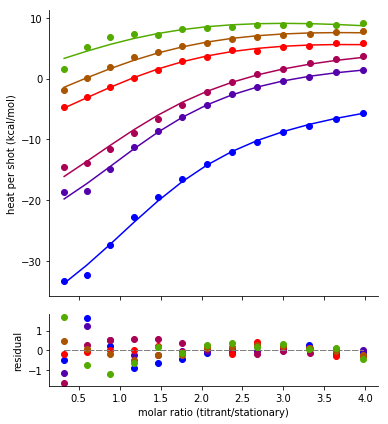

In [2]:
# --------------------------------------------------------------------
# Create a global fitting instance
g1 = pytc.GlobalFit()
vh = pytc.global_connectors.VantHoff("vh")

#--------------------------------------------------------------------------------------------------

t5 = pytc.ITCExperiment("temp-dependence/5C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t5)
g1.link_to_global(t5,"dH",vh.dH)
g1.link_to_global(t5,"K",vh.K)
g1.link_to_global(t5,"fx_competent","g_competent")


#--------------------------------------------------------------------------------------------------

t10 = pytc.ITCExperiment("temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t10)
g1.link_to_global(t10,"dH",vh.dH)
g1.link_to_global(t10,"K",vh.K)
g1.link_to_global(t10,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t17 = pytc.ITCExperiment("temp-dependence/17C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t17)
g1.link_to_global(t17,"dH",vh.dH)
g1.link_to_global(t17,"K",vh.K)
g1.link_to_global(t17,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t25 = pytc.ITCExperiment("temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t25)
g1.link_to_global(t25,"dH",vh.dH)
g1.link_to_global(t25,"K",vh.K)
g1.link_to_global(t25,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t30 = pytc.ITCExperiment("temp-dependence/30C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t30)
g1.link_to_global(t30,"dH",vh.dH)
g1.link_to_global(t30,"K",vh.K)
g1.link_to_global(t30,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t35 = pytc.ITCExperiment("temp-dependence/35C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t35)
g1.link_to_global(t35,"dH",vh.dH)
g1.link_to_global(t35,"K",vh.K)
g1.link_to_global(t35,"fx_competent","g_competent")

g1.update_bounds("g_competent",(0.5,1.5))
g1.update_guess("vh_K_ref",100)

# Do fit
g1.fit()

# Show the results
fit, ax = g1.plot()
print(g1.fit_as_csv)


#### Fit to the VantHoffExtended global connector to extract change in heat capacity (one more param)
Titrations of recombinant human S100A14 with $ZnCl_{2}$ at $5$, $10$, $17$, $25$, $30$ and $35 ^{\circ}C$.  Concentrations were: $[protein] = 110\ \mu M$ and $[ZnCl_{2}]=200\ mM$.  Buffer was $25\ mM$ Trizma, $100\ mM$ NaCl, $pH\ 7.4$.  Buffer was treated with chelex and filtered to $0.22\ \mu m$.  Data collected using a GE ITC200. 

# Fit successful? True
# AIC: 143.4170543805084
# AICc: 155.01027471949146
# BIC: 183.48110443423147
# F: 1583.982575206546
# Rsq: 0.9975982289805522
# Rsq_adjusted: 0.9969682562541397
# ln(L): -54.7085271902542
# num_obs: 78
# num_param: 16
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,g_competent,NA,1.30812e+00,1.08416e+00,float,1.00000e+00,5.00000e-01,1.50000e+00
global,vh_dH_ref,NA,-3.43520e+03,2.45593e-02,float,0.00000e+00,-inf,inf
global,vh_K_ref,NA,1.76825e+04,3.30934e-03,float,1.00000e+02,-inf,inf
global,vh_dCp,NA,5.60137e+01,4.42113e-02,float,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/5C.DH,2.68392e+04,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/5C.DH,-1.40526e+01,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/10C.DH,1.12184e+04,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/10C.DH,-1.27134e+00,0.00000e+00,f

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


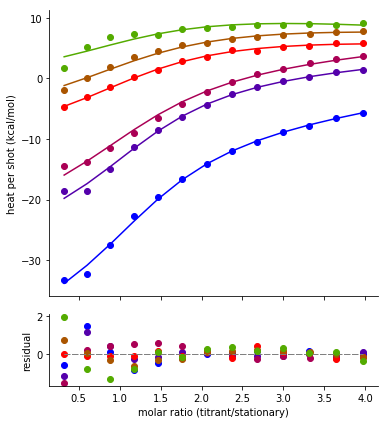

In [3]:
# --------------------------------------------------------------------
# Create a global fitting instance
g2 = pytc.GlobalFit()
vhe = pytc.global_connectors.VantHoffExtended("vh")

#--------------------------------------------------------------------------------------------------

t5 = pytc.ITCExperiment("temp-dependence/5C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t5)
g2.link_to_global(t5,"dH",vhe.dH)
g2.link_to_global(t5,"K",vhe.K)
g2.link_to_global(t5,"fx_competent","g_competent")


#--------------------------------------------------------------------------------------------------

t10 = pytc.ITCExperiment("temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t10)
g2.link_to_global(t10,"dH",vhe.dH)
g2.link_to_global(t10,"K",vhe.K)
g2.link_to_global(t10,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t17 = pytc.ITCExperiment("temp-dependence/17C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t17)
g2.link_to_global(t17,"dH",vhe.dH)
g2.link_to_global(t17,"K",vhe.K)
g2.link_to_global(t17,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t25 = pytc.ITCExperiment("temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t25)
g2.link_to_global(t25,"dH",vhe.dH)
g2.link_to_global(t25,"K",vhe.K)
g2.link_to_global(t25,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t30 = pytc.ITCExperiment("temp-dependence/30C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t30)
g2.link_to_global(t30,"dH",vhe.dH)
g2.link_to_global(t30,"K",vhe.K)
g2.link_to_global(t30,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t35 = pytc.ITCExperiment("temp-dependence/35C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t35)
g2.link_to_global(t35,"dH",vhe.dH)
g2.link_to_global(t35,"K",vhe.K)
g2.link_to_global(t35,"fx_competent","g_competent")

g2.update_bounds("g_competent",(0.5,1.5))
g2.update_guess("vh_K_ref",100)

# Do fit
g2.fit()

# Show the results
fit, ax = g2.plot()
print(g2.fit_as_csv)


#### Use util.choose_model to select between the two models
Does not support adding dCp

Using fit already done for model 1.

Model 1 fit
# Fit successful? True
# AIC: 143.78356229486837
# AICc: 153.98356229486836
# BIC: 181.49090352190186
# F: 1666.0899790423941
# Rsq: 0.9975242429326451
# Rsq_adjusted: 0.9969252694486076
# ln(L): -55.891781147434195
# num_obs: 78
# num_param: 15
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,vh_dH_vanthoff,NA,-6.23431e+03,3.60441e-02,float,0.00000e+00,-inf,inf
global,g_competent,NA,1.47190e+00,1.87704e+00,float,1.00000e+00,5.00000e-01,1.50000e+00
global,vh_K_ref,NA,9.05920e+03,1.34032e-02,float,1.00000e+02,-inf,inf
local,dilution_heat,temp-dependence/5C.DH,1.18811e+04,7.44973e-03,float,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/5C.DH,-7.42384e+00,5.60201e-01,float,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/10C.DH,-4.08149e+03,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/10C.DH,5.63491e+00,0.00000e+00,float,0.000

{'AIC': (False, 0.45431429070992035),
 'AICc': (True, 0.62559291881975365),
 'BIC': (True, 0.73009417999582482)}

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


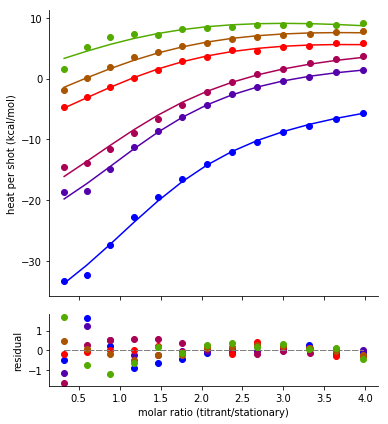

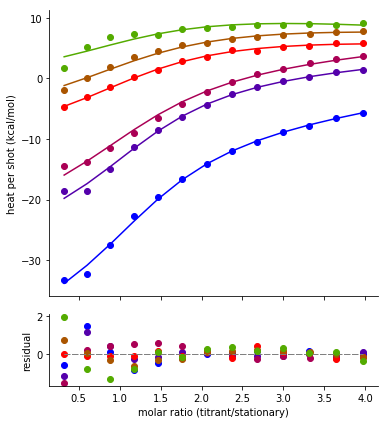

In [4]:
pytc.util.choose_model(g1,g2)